# Block reward schedule.

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


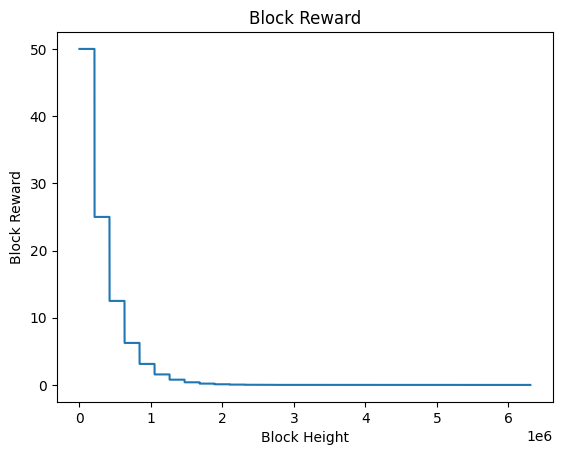

In [10]:
# Visualise block_reward.csv using pyplot

# Prerequisite: Run this to generate block_reward.csv
# go test ./... -v -run TestGetBlockReward

!pip3 install matplotlib pandas

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('block_reward.csv')
# file is simple x,y where x=block_height, y=block_reward
# so we can use a simple line plot

plt.plot(df['block_height'], df['reward'])
plt.xlabel('Block Height')
plt.ylabel('Block Reward')
plt.title('Block Reward')
plt.show()

# State synchronisation costs.

## Ethereum vs. Bitcoin state growth.

## Nakamoto chains.

In [3]:

# Model the size of transactions, blocks, and the block capacity.
# 
# 
MEGABYTE = 1024 * 1024
max_block_size = MEGABYTE

# BLOCK HEADER SIZE.
"""
type BlockHeader struct {
	ParentHash             [32]byte
	ParentTotalWork        big.Int
	Timestamp              uint64
	NumTransactions        uint64
	TransactionsMerkleRoot [32]byte
	Nonce                  [32]byte
	Graffiti               [32]byte
}
"""
block_header_size = 32 + 64 + 8 + 8 + 32 + 32 + 32 
block_header_size = 208

# TRANSACTION SIZE.
"""
type RawTransaction struct {
	Version    byte     `json:"version"`
	Sig        [64]byte `json:"sig"`
	FromPubkey [65]byte `json:"from"`
	ToPubkey   [65]byte `json:"to"`
	Amount     uint64   `json:"amount"`
	Fee        uint64   `json:"fee"`
	Nonce      uint64   `json:"nonce"`
}
"""
tx_size = 1 + 65 + 65 + 8 + 8 + 8
tx_size = 155

block_body_max_size = max_block_size - block_header_size
max_txs_per_block = (max_block_size - block_header_size) // tx_size

print(f"block_header_size: {block_header_size}")
print(f"tx_size: {tx_size}")

print(f"block_body_max_size: {block_body_max_size}")
print(f"max_txs_per_block: {max_txs_per_block}")

block_header_size: 208
tx_size: 155
block_body_max_size: 1048368
max_txs_per_block: 6763


In [ ]:
import math

MEGABYTE = 1000 * 1000
KILOBYTE = 1000

def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])

def convert_time(secs):
    if secs < 60:
        return f"{secs:.2f} s"
    elif secs < 60 * 60:
        return f"{secs // 60} mins"
    elif secs < 60 * 60 * 24:
        return f"{secs // 60 // 60} hrs"
    elif secs < 60 * 60 * 24 * 7:
        return f"{secs // 60 // 60 // 24} days"
    else:
        return f"{secs // 60 // 60 // 24 // 7} wks"

number_of_peers = 5
download_bandwidth_per_second = 2 * MEGABYTE
block_rate = 1 / 10
max_block_size = 1 * MEGABYTE
block_header_size = 208
tx_size = 155
block_body_max_size = max_block_size - block_header_size
max_txs_per_block = block_body_max_size // tx_size

# Our last sync = 1 week ago = 7*24*60/(1/10) = 1008 blocks
num_blocks_to_sync_1wk = 7*24*60/(10/1)
print(f"number of blocks to sync in 1wk: {num_blocks_to_sync_1wk}")
time_to_sync_headers = num_blocks_to_sync_1wk * block_header_size / download_bandwidth_per_second
print(f"download to sync headers: {convert_size(num_blocks_to_sync_1wk * block_header_size)}")
print(f"time to sync headers: {convert_time(time_to_sync_headers)}")
time_to_sync_bodies = num_blocks_to_sync_1wk * block_body_max_size / download_bandwidth_per_second
print(f"download to sync bodies: {convert_size(num_blocks_to_sync_1wk * block_body_max_size)}")
print(f"time to sync bodies: {convert_time(time_to_sync_bodies)}")

number of blocks to sync in 1wk: 1008.0
download to sync headers: 204.75 KB
time to sync headers: 0.10 s
download to sync bodies: 961.1 MB
time to sync bodies: 8.0 mins


## Bitcoin statistics.

```
// Performance numbers:
// 850,000 Bitcoin blocks since 2009.
// 850000*32 = 27.2 MB of a chain hash list
// Not too bad, we can fit it all in memory.
// query_size = 32 B, N = 850,000
// log(850,000) * 32 = 20 * 32 = 640 B
// 20 rounds of binary search to interactively find common ancestor between two networked nodes.
```